<a href="https://colab.research.google.com/github/Mahsabeigi33/price-prediction-regression/blob/main/price_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [16]:
Price_Prediction = pd.read_csv('/content/sample_data/scrap price.csv')
Price_Prediction

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.set(style="white",font='serif' )

Text(-12.055555555555548, 0.5, 'price')

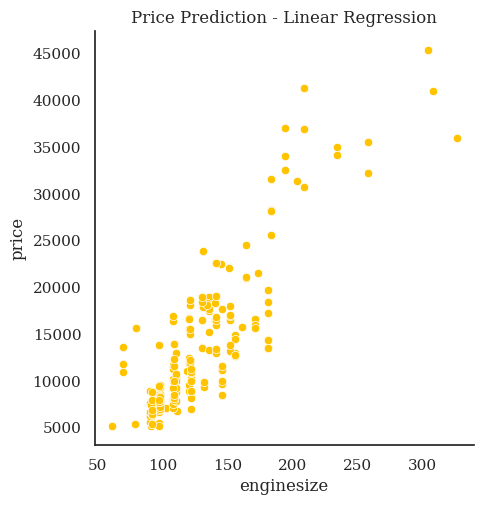

In [8]:
# plt.figure(figsize=(50, 20))
custom_palette = ["#FFC300", "#FF5733", "#C70039", "#900C3F"]
sns.set_palette(custom_palette)
sns.relplot(x='enginesize', y='price', data=Price_Prediction)
plt.title('Price Prediction - Linear Regression')
plt.xlabel('enginesize')
plt.ylabel('price')

Text(0, 0.5, 'Price')

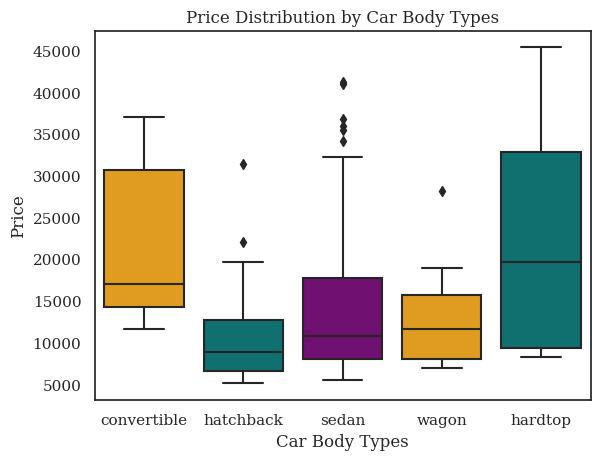

In [9]:
sns.boxplot(x='carbody', y='price', data=Price_Prediction, palette=["#FFA500", "#008080", "#800080"])
plt.title('Price Distribution by Car Body Types')
plt.xlabel('Car Body Types')
plt.ylabel('Price')

In [15]:
df=Price_Prediction.copy()


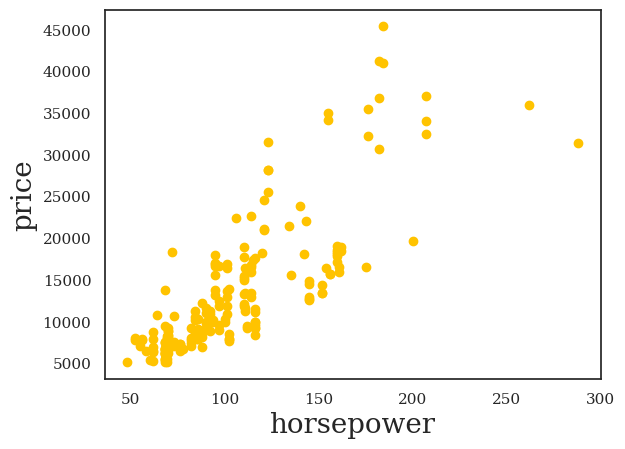

In [32]:
y=df['price']
x1=df['horsepower']
X=x1.to_numpy().reshape(-1, 1)

plt.scatter(x1,y)
plt.xlabel('horsepower',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

# Split the input features (x) into x_train and x_test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

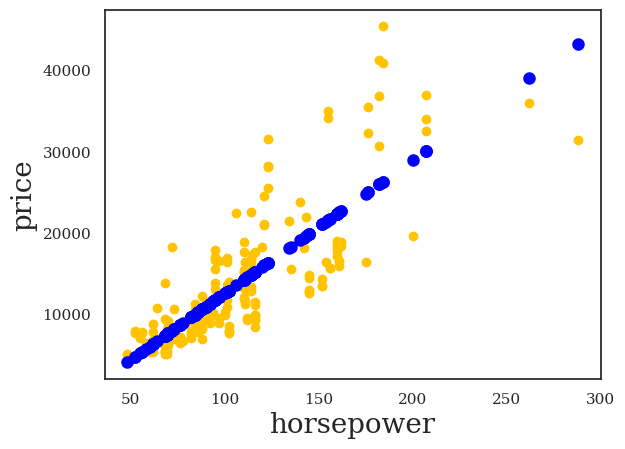

In [38]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X,y)
A=clf.coef_
B =clf.intercept_
yhat=B+A*X
plt.scatter(x1,y)
plt.scatter(x1,yhat,lw=3,c='blue')
plt.xlabel('horsepower',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

In [40]:
import statsmodels.api as sm
Input=sm.add_constant(X)
model=sm.OLS(y,Input).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.48e-48
Time:                        06:05:27   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
x1           163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""